In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.applications.vgg16 import preprocess_input
import sys

In [ ]:
#Functions

def p2f(x):
    return float(x.strip('%').replace(',','.'))/100

In [ ]:
#Models

#VGG16

mnet = tf.keras.applications.vgg16.VGG16(
    include_top = False, pooling = 'avg',
    weights = 'imagenet', input_shape = (512,512,3))

model = models.Sequential([
    mnet,
    layers.Dropout(0.5),
    layers.Dense(2,activation = 'softmax')])  
    
model.layers[0].trainable = False   
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 
model.summary()

#ResNet

mnet2 = tf.keras.applications.ResNet50(
          include_top = False, pooling = 'avg',
          weights = 'imagenet', input_shape = (512,512,3)
  )

model2 = models.Sequential([
    mnet2,
    layers.Dropout(0.5),
    layers.Dense(2,activation = 'softmax')])  
    
model2.layers[0].trainable = False   
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 
model2.summary()

#Inception

mnet3 = tf.keras.applications.InceptionV3(
          include_top = False, pooling = 'avg',
          weights = 'imagenet', input_shape = (512,512,3)
      )

model3 = models.Sequential([
    mnet3,
    layers.Dropout(0.5),
    layers.Dense(2,activation = 'softmax')])  
    
model3.layers[0].trainable = False   
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 
model3.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________
94781440/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functiona

In [ ]:
# Create dataframe
background_dataframe = pd.read_csv('/content/drive/MyDrive/Tesis_StevenGarcia/Dataset/etiquetas_ki67_Colab.csv', sep=';', converters={'Porcentaje':p2f}) # read dataframe
background_dataframe['label'] = background_dataframe['Porcentaje']  > 0.5 # Add label column
df_ki67 = background_dataframe.drop(['Campo', 'Porcentaje'], axis=1) # drop columns
df_ki67["label"] = df_ki67["label"].astype(int)
NaN = np.nan
df_ki67['Data_img'] = NaN
df_ki67['Data_img'] = df_ki67['Data_img'].astype(object)

# Load images
cant_imag = df_ki67.shape[0] # images quantity
images = [] #redimensionar la imagen a 512
width = 512
height = 512
dsize = (width, height)

#Add a Image(Array) into a unique row in a Dataframe
for i in range(len(df_ki67)):
    img_path = cv2.imread(df_ki67['Path'].loc[i] , 1)
    img_res = cv2.COLOR_BGR2RGB
    img_res = cv2.resize(img_path,dsize)
    img_res = img_res/255
    df_ki67.at[i, 'Data_img'] = np.asarray(img_res)


In [ ]:
df_ki67.head()

,Path,label,Data_img
0,/content/drive/MyDrive/Tesis_StevenGarcia/Data...,0,"[[[0.38823529411764707, 0.34901960784313724, 0..."
1,/content/drive/MyDrive/Tesis_StevenGarcia/Data...,0,"[[[0.4980392156862745, 0.5411764705882353, 0.4..."
2,/content/drive/MyDrive/Tesis_StevenGarcia/Data...,0,"[[[0.2901960784313726, 0.2549019607843137, 0.1..."
3,/content/drive/MyDrive/Tesis_StevenGarcia/Data...,0,"[[[0.41568627450980394, 0.33725490196078434, 0..."
4,/content/drive/MyDrive/Tesis_StevenGarcia/Data...,0,"[[[0.5529411764705883, 0.6078431372549019, 0.4..."


In [ ]:
X = np.zeros((len(df_ki67), width,height,3))
y = np.zeros((len(df_ki67), 1))

skf = StratifiedKFold(n_splits = 10, shuffle= True ,random_state = 1) #cambie el valor de suffle a True, en False daba error

for i in range(len(df_ki67)):
  X[i] = df_ki67['Data_img'].loc[i]
  y[i] = df_ki67['label'].loc[i]


In [ ]:
saves = []

for train_index, test_index in skf.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  print("******************************************************************************")
  print(train_index)
  print(test_index)
  print("******************************************************************************")

  print("----------------VGG16---------------------")
  history = model.fit(X_train,
            y_train,
            epochs=5,
            validation_data = (X_test, y_test), verbose = 2
            )
  
  test_loss, test_acc = model.evaluate(X_test, y_test)
  saves.append(test_acc)


******************************************************************************
[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 71 72 73 74 75 76 78 79
 80 82 83 84 85 86 87 88 89]
[ 0  2 16 41 45 66 70 77 81]
******************************************************************************
----------------VGG16---------------------
Epoch 1/5
3/3 - 39s - loss: 0.7181 - accuracy: 0.5679 - val_loss: 0.6573 - val_accuracy: 0.5556 - 39s/epoch - 13s/step
Epoch 2/5
3/3 - 3s - loss: 0.7234 - accuracy: 0.5432 - val_loss: 0.6483 - val_accuracy: 0.5556 - 3s/epoch - 855ms/step
Epoch 3/5
3/3 - 3s - loss: 0.7027 - accuracy: 0.5679 - val_loss: 0.6389 - val_accuracy: 0.5556 - 3s/epoch - 866ms/step
Epoch 4/5
3/3 - 3s - loss: 0.6518 - accuracy: 0.6420 - val_loss: 0.6317 - val_accuracy: 0.5556 - 3s/epoch - 866ms/step
Epoch 5/5
3/3 - 3s - loss: 0.7456 - accuracy: 

In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 361ms/step - loss: 0.3363 - accuracy: 0.8889


[0.3362772762775421, 0.8888888955116272]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:1]

array([[0.6554702, 0.3445298]], dtype=float32)

----------------VGG16---------------------


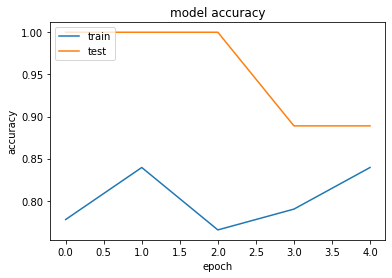

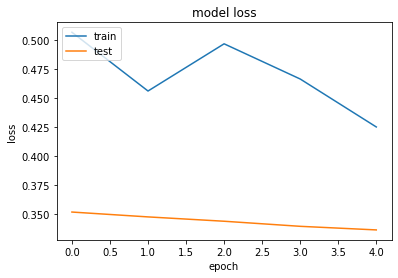

In [ ]:
#Graficas

#----------------VGG16---------------------
# summarize history for accuracy
print("----------------VGG16---------------------")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()